### Installation
First make sure you have the openllmtelemetry back with the bedrock extras specified. You can use the pip command below

In [ ]:
%pip install openllmtelemetry[bedrock]

### Configuring your API Key

`openllmtelemetry` supports instrumenting calls to invoke models using the boto3 client's bedrock-runtime and interaction with LLMs such as Titan. With opentelemetry instrumentation you gather and send these to WhyLabs, and for this we need to set your WhyLabs API key, as well as the model you want to send the traces to in WhyLabs platform.

Note: The example assumes you boto3 credentials are working to be able to invoke bedrock-runtime models, for details see [boto3 documentation](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/credentials.html)

In order to send the traces to whylabs you need to configure your model-id and WhyLabs API keys first. If you also want to onboard with WhyLabs Guardrail API, see further details on how to do that [here](https://docs.whylabs.ai/docs/secure/guardrails-api), and after you setup your endpoint you can use that in the `WHYLABS_GUARD_ENDPOINT` below. You can skip that part for now to see straghtforward LLM tracing in WhyLabs platform, but you will get better insights and security by using the WhyLabs Guardrail API as that will add additional metrics to your traces.

In [1]:
import os

os.environ["WHYLABS_API_KEY"] = "replace-with-whylabs-api-key"
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = "replace-with-model-id" #  e.g. "model-1"
os.environ["WHYLABS_GUARD_ENDPOINT"] = ""
os.environ["WHYLABS_GUARD_API_KEY"] = ""

### Instrumenting your LLM Application

You can use the following to instrument your python application that interacts with bedrock-runtime models. After this call, interactions that invoke models with boto3 client will automatically gather open telemetry traces for your application.

In [2]:
import openllmtelemetry

tracer = openllmtelemetry.instrument()

### Your LLM calls to Bedrock

Here is a minimal example of invoking a bedrock-runtime model

In [5]:
import json
from logging import getLogger

import boto3

logger = getLogger(__name__)

def bedrock_titan(prompt: str):
    response_body = None
    try:
        model_id = 'amazon.titan-text-express-v1'
        brt = boto3.client(service_name='bedrock-runtime')
        response = brt.invoke_model(body=json.dumps({"inputText": prompt}), modelId=model_id)
        response_body = json.loads(response.get("body").read())

    except Exception as error:
        logger.error(f"A client error occurred:{error}")

    return response_body

response = bedrock_titan("What are the different version of Titan on AWS Bedrock?")
print(response)

{'inputTextTokenCount': 12, 'results': [{'tokenCount': 58, 'outputText': "\nAmazon Bedrock is a managed service that makes foundation models from leading AI startup and Amazon's own Titan models available through APIs. For up-to-date information on Amazon Bedrock and how 3P models are approved, endorsed or selected please see the provided documentation and relevant FAQs.", 'completionReason': 'FINISH'}]}


From this example, you can see what the corresponding traces look like in WhyLabs:

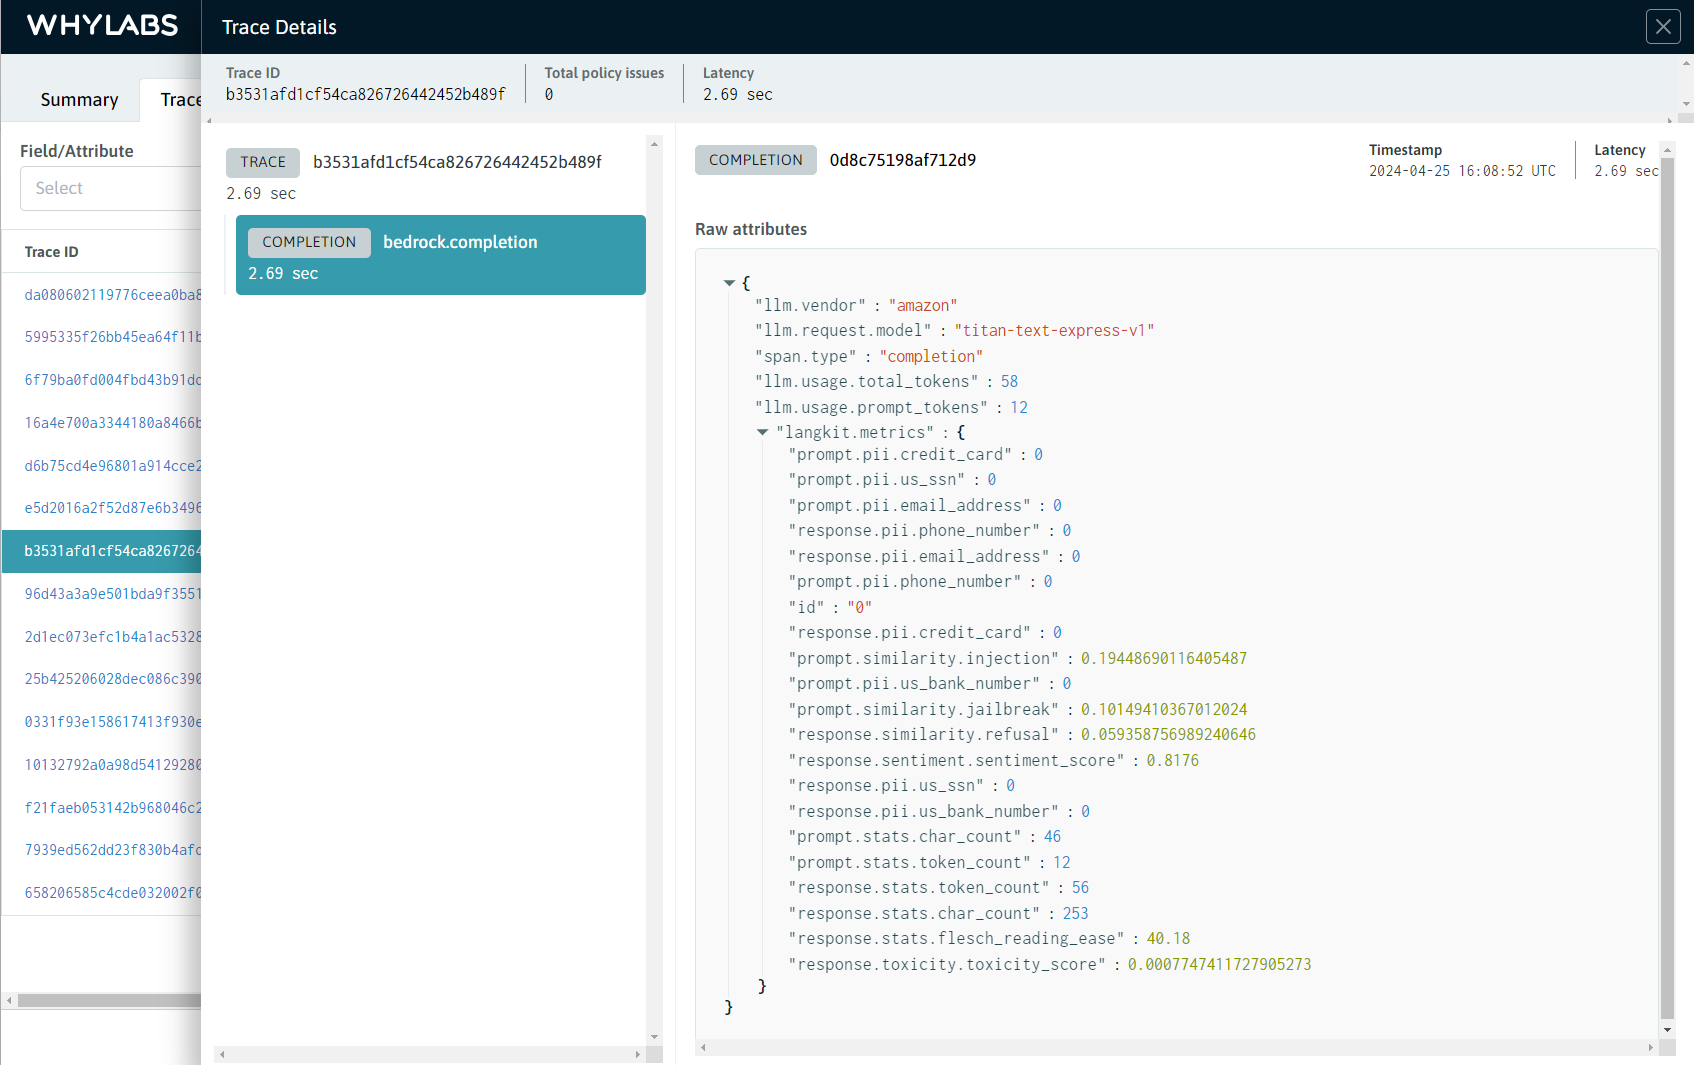